\author{Roberto Vásquez Martínez}
\date{20/Octubre/2021}
\maketitle

# Árboles de decisión #

## Análisis de la Base de Datos ##

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

A continuación se analiza la base de datos de iris de Fisher. En primera instancia capturamos los atributos de cada una de las muestras en un 'DataFrame', mostramos la estructura

In [2]:
# Loading the iris data
data = load_iris()
df_data = pd.DataFrame(data.data, columns=data.feature_names)
print(df_data.head())
df_data['species']=data.target

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Obtenemos el tamaño de la muestra

In [3]:
print(df_data.shape[0])

150


Observamos que tenemos una muestra tamaño 150 y en la que cada muestra tiene 4 atributos, que corresponden al ancho y largo del sépalo y pétalos de distintas especies de Iris que especificaremos a continuación.

La clase a la que pertenece cada una de las muestras se codifica por el arreglo siguiente

In [4]:
cod_target=set(data.target)
print(cod_target)

{0, 1, 2}


Cada uno de estos códigos corresponde a respectivamente a las siguientes especies de *Iris*

In [5]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


Además analizaremos a partir de esta base datos cuantas observaciones tenemos por especie.

In [6]:
num_setosa=len(df_data[df_data.species==0])
num_versicolor=len(df_data[df_data.species==1])
num_virginica=len(df_data[df_data.species==2])
print('Numero de observaciones de la especie setosa: %d' %(num_setosa))
print('Numero de observaciones de la espcie versicolor: %d' %(num_versicolor))
print('Numero de observaciones de la especie virginica: %d' %(num_virginica))

Numero de observaciones de la especie setosa: 50
Numero de observaciones de la espcie versicolor: 50
Numero de observaciones de la especie virginica: 50


De lo anterior podemos concluir que tenemos 50 observaciones de cada especie. Ahora formamos a partir de la base de datos el subconjunto de entrenamiento y prueba.

In [7]:
# Extracting data attributes
X = data.data
# Extracting target/ class labels
y = data.target
# Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

Posteriormente analizaremos la proporción de cada especie en el conjunto de entrenamiento y el de prueba.

In [8]:
num_train_setosa=np.count_nonzero(y_train==0)
num_train_versicolor=np.count_nonzero(y_train==1)
num_train_virginica=np.count_nonzero(y_train==2)
print('Conjunto de entrenamiento: setosa: %d, versicolor: %d, virginica: %d' %(num_train_setosa,num_train_versicolor,num_train_virginica))

Conjunto de entrenamiento: setosa: 35, versicolor: 42, virginica: 35


In [9]:
num_test_setosa=np.count_nonzero(y_test==0)
num_test_versicolor=np.count_nonzero(y_test==1)
num_test_virginica=np.count_nonzero(y_test==2)
print('Conjunto de prueba: setosa: %d, versicolor: %d, virginica: %d' %(num_test_setosa,num_test_versicolor,num_test_virginica))

Conjunto de prueba: setosa: 15, versicolor: 8, virginica: 15


Tomamos en cuenta que con el código anterior fijamos el conjunto de prueba con un tamaño de 1/4 parte del conjunto total, es decir, el conjunto de prueba tiene tamaño 38. 

## Implementación del ID3 ##

### Parámetro min_samples_split

El parámetro *min_samples_split* en el ID3 implementado en *sklearn.tree* lo que hace es poner una restricción para que dado un nodo se creen sus hijos, la reestricción que pone es que al menos debe haber el número de observaciones que se especifiquen en *min_samples_split* para proceder con la partición en ese nodo. Esto hace que los nodos que corresponden a cada una de las especide de Iris en el conjunto de entrenamiento sean propensas a mayor impureza en el conjunto de entrenamiento mayores valores de *min_samples_split* generan arboles de decisión cada vez menos profundos. 

El valor por default de *min_samples_split* es 2, lo que significa que podemos hacer la partición de cualquier nodo que tenga al menos 2 observaciones, al final los nodos más profundos tienen menos de dos observaciones, es decir, 1 observación por lo que la clasificación del conjunto de entrenamiento es perfecta.

Por otro lado para mayores valores de *min_samples_split* solo podemos ejecutar la partición para nodos con un numero mayor de observaciones al especificado en *min_samples_split*, lo que reduce el sobreajuste ya que nos estamos preguntando por la ganancia de información de un conjunto de observaciones acotado inferiormente.

A continuación hacemos la clasificación para distintos valores el parámetro *min_samples_split*. Los valores con los que probaremos son de la forma 
$$v=2i\ \ \text{ para }i=1,2,\dots,25$$

In [12]:
from sklearn.tree import DecisionTreeClassifier
#Importing the accuracy metric from sklearn.metrics library
from sklearn.metrics import accuracy_score
values_min_split=np.arange(2,72,2)

Graficamos el desempeño de la efectividad en la clasificación del conjunto de prueba y de entrenamiento para los distintos valores de parámetro *min_samples_split* en el clasificador.

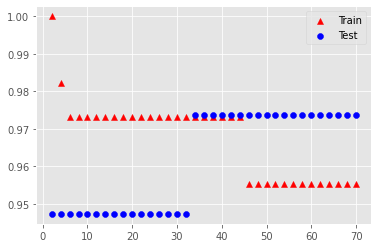

In [13]:
acc_train,acc_test=[],[]
for v in values_min_split:
    clf = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=v)
    clf.fit(X_train,y_train)
    acc_train.append(accuracy_score(y_true=y_train,y_pred=clf.predict(X_train)))
    y_pred=clf.predict(X_test)
    acc_test.append(accuracy_score(y_true=y_test,y_pred=y_pred))

# Plotting
plt.style.use('ggplot')
plt.scatter(values_min_split,acc_train,label='Train', color='red',marker='^')
plt.scatter(values_min_split,acc_test,label='Test',color='blue',marker='o')
plt.legend()

Observamos que la precisión en el conjunto de entrenamiento se ve reducida al aumentar el valor de *min_samples_split*, pues requerimos al menos esa cantidad de observaciones para preguntar, y aquellos nodos con observaciones menores a *min_samples_split* son nuestos nodos más profundos, es decir, las hojas del árbol. Mientras más grande sea *min_samples_split* mayor impureza habra en las hojas.

Por otra parte, cuando *min_samples_split* igual a 2 entonces tenemos una clasificación perfecta pues los nodos más profundos son de tamaño uno, pero precisamente esa complejidad del árbol hace que la predicción en el conjunto de prueba sea menor.

Como la especie con mayor representación en el conjunto de entrenamiento es de tamaño 42, cuando *min_samples_split* es mayor a 44 la impureza aumenta significativamente pues podemos tener un nodo hoja de tamaño 43 o 44 en el que evidentemente habrá error pues la mayor representación de una especie es 42. 

Veamos también que la precisión del conjunto de prueba se ve reducida de 2 al intervalo $[4,32]$, sin embargo se guarda aproximadamente la misma relación respecto a la precisión del conjunto de entrenamiento, pues con *min_samples_split* igual a 2 la clasificación en el conjunto de prueba fue perfecta.

Observamos que la precisión del conjunto de prueba mejora sustancialmente y es superior a la del conjunto de entrenamiento cuando *min_samples_split* es mayor o igual a 34. 

Con un valor de *min_samples_split* mayor a 34 realmente estamos poniendo una reestricción a la clasificación pues la especie menos representada tiene 35 observaciones mientras que la más representada tiene 42. Por ejemplo, si hacemos la partición con *min_samples_split* igual 32 puede que estemos preguntando por un nodo en donde hay 33 observaciones del mismo tipo, y sólo estamos agregando complejidad innecesaria al árbol de decisión, mientras que si preguntamenos en un nodo con un numéro mayor a 34 observaciones, por ejemplo *min_samples_split* igual a 40 en un nodo con esa cantidad de observaciones es claro que aumenta la posibilidad de que haya al menos dos clases representadas por lo que hacer una partición en ese nodo sería necesario. Al acotar inferiormente el número de observaciones que se necesitan para preguntar reducimos la complejidad innecesaria del árbol de decisión, en consecuencia observamos un mejor comportamiento en la predicción en el conjunto de prueba.

Concluimos de lo anterior que con *min_samples_split* mayor a 44 aseguramos que hacemos las preguntas necesarias para hacer la clasificación pues la especie con mayor representación en la muestra de entrenamiento tiene 42 observaciones, en consecuencia si bien aumentamos la impureza en los nodos hoja aseguramos que no se creo complejidad innecesaria en el árbol, en consecuencia evitamos el sobreajuste y obtenemos mejores precisiones en el conjunto de prueba.